### 代码模拟梯度下降

$f(x) = (x - 3.5)^2 - 4.5x + 10$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 损失函数
f = lambda x : (x - 3.5)**2 - 4.5*x + 10
x = np.linspace(0,12,200)
y = f(x)
plt.plot(x,y,color = 'g')

#### 方式一（求导）

In [ ]:
g = lambda x : 2*(x - 3.5) - 4.5

# 令 g = 0
# 2 * （x - 3.5） - 4.5 = 0
# 2x - 11.5 = 0 
x_min = 11.5/2
print(x_min)

#### 方式二（梯度下降）

In [ ]:
step = 0.2 # 学习率，步幅（道士下山）

# 1、瞎蒙,随机的最小值
x_ = np.random.randint(0,12,size = 1)[0]

# 记录上一次梯度下降的x_值，比较
last_x_ = x_ + 2 # 一开始 last_x_ 和 x_ 有一个比较大差别，就行
# 需要使用x_ 和 last_x_ 差值，做为退出条件

# 精确度，退出条件
precision = 1e-8 # |x_ - last_x_| < precison

# 列表，记录所有梯度下降更新的x值
x_result = [x_]
print('++++++++++++++++++++++++++++++',x_)
count = 1
while True:
#     if np.abs(x_ - last_x_) < precision: # 判断收敛条件
#         break
#     if count > 100: # 判断最大的迭代次数
#         break
#     if np.abs(g(x_)) < precision: # 判断的梯度趋近0，到达了最小值，山谷处，导数为0
#         break
    
    if np.abs(f(x_) - f(last_x_))/np.abs(f(last_x_)) < precision: # 损失函数，变化非常小
        break
    # 记录上一次last_x_
    last_x_ = x_ # 将当前的x_赋值给last_x_
    # 更新当前的x_
    x_ = x_ - step * g(x_) # 梯度下降更新权重，目标值
    x_result.append(x_)
    print('-------------------------------',x_)
    count += 1

plt.figure(figsize=(9,6))
plt.plot(x,y,color = 'red')

plt.scatter(np.array(x_result),f(np.array(x_result)),color = 'green')

### 批量梯度下降BGD

#### 梯度下降

真实的斜率和截距是： 5 3
梯度下降计算所得是： [[5.11939784]
 [2.93167121]]


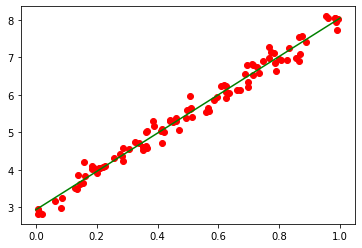

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# 创建数据
X = np.random.rand(100,1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100,1)*0.2

# 初始化 系数
# 斜率和截距
theta = np.random.randn(2,1) # 随机，瞎蒙
# 梯度下降，轮次
epoches = 2000
# 学习率
# learning_rate = 0.01
t0,t1 = 5,1000
# 逆时衰减，learning 5/1000 = 0.005
def learning_rate_schedule(t):
    return t0/(t1 + t)

# 偏置项，截距b，w0 系数 1
# f(x) = w0 * 1 + w1 * x1 + w2 * x2 + ……
X_ = np.c_[X,np.ones((100,1))] # np.concatenate

# 实现梯度下降
for epoche in range(epoches):
    # 根据公式，计算梯度
    g = X_.T.dot(X_.dot(theta) - y)
    learning_rate = learning_rate_schedule(epoche)
    theta = theta - learning_rate * g
print('真实的斜率和截距是：',w,b)
print('梯度下降计算所得是：',theta)

plt.scatter(X,y,color = 'red')
x_ = np.linspace(0,1,100)
y_ = x_ * theta[0,0] + theta[1,0]
plt.plot(x_,y_,color = 'green')

#### 正规方程

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_,y)
print('线性回归算法拟合的系数是：',model.coef_)

#### 梯度下降（多元一次线性回归）

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# 创建数据
X = np.random.rand(100,7) # 7个特征
w = np.random.randint(1,10,size = (7,1))
b = np.random.randint(1,10,size = 1) # 一个截距
y = X.dot(w) + b + np.random.randn(100,1)

# 初始化 系数
# 斜率和截距
theta = np.random.randn(8,1) # 随机，瞎蒙
# 梯度下降，轮次
epoches = 2000
# 学习率
# learning_rate = 0.01
t0,t1 = 1,100
# 逆时衰减，learning 5/1000 = 0.005
def learning_rate_schedule(t):
    return t0/(t1 + t)

# 偏置项，截距b，w0 系数 1
# f(x) = w0 * 1 + w1 * x1 + w2 * x2 + ……
X_ = np.c_[X,np.ones((100,1))] # np.concatenate

# 实现梯度下降
for epoche in range(epoches):
    # 根据公式，计算梯度
    g = X_.T.dot(X_.dot(theta) - y)
    learning_rate = learning_rate_schedule(epoche)
    theta = theta - learning_rate * g
print('真实的斜率和截距是：',w,b)
print('梯度下降计算所得是：',theta.round(5))

真实的斜率和截距是： [[6]
 [5]
 [9]
 [5]
 [2]
 [9]
 [3]] [9]
梯度下降计算所得是： [[6.62069]
 [4.99151]
 [9.11982]
 [4.80173]
 [1.5917 ]
 [9.35627]
 [2.49168]
 [9.05151]]


In [ ]:
# numpy 广播
w = np.random.randint(1,10,size = (7,1))
y = X.dot(w) + b + np.random.randn(100,1)
print(y.shape)
print((X.dot(w)).shape)

In [ ]:
# 梯度，8个，7特征+ 1截距 = 8，
g = X_.T.dot(X_.dot(theta) - y)
g.shape

In [ ]:
# 100行 1列
print((X_.dot(theta) - y).shape)

In [ ]:
theta = np.random.randn(8,1) # 随机，瞎蒙
print((X_.dot(theta)).shape)

In [ ]:
X_.shape

In [ ]:
theta.shape

### 随机梯度下降SGD

#### 随机抽取一个样本

正确的斜率和截距是： 7 1
SGD计算的斜率截距是： [[6.4149111 ]
 [1.61430543]]
CPU times: total: 5.33 s
Wall time: 5.41 s


Text(0.5, 1.0, 'Epoches VS Function Loss')

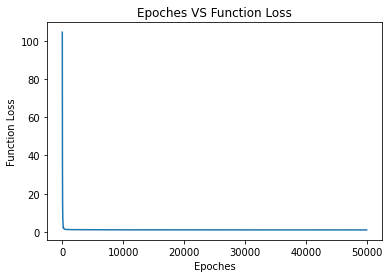

In [21]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差
rs = np.random.RandomState(seed = 42) # 固定随机数种子

# 1、创建数据集X，y
X = 2 * rs.rand(100, 1)
w,b = rs.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X_ = np.c_[X, np.ones((100, 1))]

# 3、创建超参数轮次、样本数量
epoches = 50000

# 4、定义一个函数来调整学习率
t0, t1 = 1, 100
def learning_rate_schedule(t):
    return t0/(t+t1)

# 5、初始化 W0...Wn，标准正太分布创建W
theta = rs.randn(2, 1) # 最后一个是偏置项，截距

# 6、梯度下降
loss = []
for i in range(epoches):
    index = np.random.randint(0,100,size = 1) # 数组一维
    X_i = X_[index]
    y_i = y[index]
#     print(X_i,y_i)
    g = X_i.T.dot(X_i.dot(theta) - y_i)
    learning_rate = learning_rate_schedule(i)
    theta -= learning_rate * g
    y_pred = X_.dot(theta) # 根据更新的系数，计算预测的目标值
    loss.append(mean_squared_error(y,y_pred))
print('正确的斜率和截距是：',w,b)
print('SGD计算的斜率截距是：',theta)

plt.plot(loss)
plt.xlabel('Epoches')
plt.ylabel('Function Loss')
plt.title('Epoches VS Function Loss')

In [14]:
loss[-20:]

[1.362585282031234,
 1.3625457691031835,
 1.3625329186960946,
 1.362538975184603,
 1.3625326251070045,
 1.3625269501250656,
 1.3625310919019413,
 1.362530064141895,
 1.3625005743338305,
 1.362471712070739,
 1.3624595157479065,
 1.3624566838519743,
 1.3624364023709137,
 1.362439929260734,
 1.3624554746259607,
 1.3624263647423178,
 1.3623973085669439,
 1.3623782985728465,
 1.3623794055054756,
 1.3623791384982218]

#### 随机梯度下降优化

正确的斜率和截距是： 7 1
SGD计算的斜率截距是： [[7.06714153]
 [1.01851296]]
CPU times: total: 46.9 ms
Wall time: 40.5 ms


Text(0.5, 1.0, 'Epoches VS Function Loss')

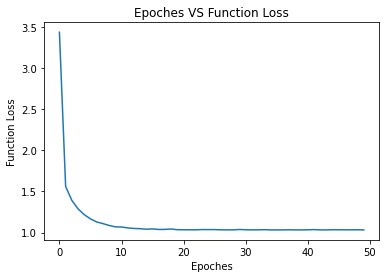

In [23]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差
rs = np.random.RandomState(seed = 42) # 固定随机数种子

# 1、创建数据集X，y
X = 2 * rs.rand(100, 1)
w,b = rs.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X_ = np.c_[X, np.ones((100, 1))]

# 3、创建超参数轮次、样本数量
epoches = 50

# 4、定义一个函数来调整学习率
t0, t1 = 1, 100
def learning_rate_schedule(t):
    return t0/(t+t1)

# 5、初始化 W0...Wn，标准正太分布创建W
theta = rs.randn(2, 1) # 最后一个是偏置项，截距

# 6、梯度下降
loss = []
for i in range(epoches):
    indexes = np.arange(100)
    np.random.shuffle(indexes) # 打乱顺序
    X_ = X_[indexes] # 重排，洗牌
    y = y[indexes]
    for X_i,y_i in zip(X_,y): # 这里的依次遍历，相当于，随机抽取
        X_i = X_i.reshape(-1,2)
        y_i = y_i.reshape(-1,1)
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        learning_rate = learning_rate_schedule(i)
        theta -= learning_rate * g
    y_pred = X_.dot(theta) # 根据更新的系数，计算预测的目标值
    loss.append(mean_squared_error(y,y_pred))
print('正确的斜率和截距是：',w,b)
print('SGD计算的斜率截距是：',theta)

plt.plot(loss)
plt.xlabel('Epoches')
plt.ylabel('Function Loss')
plt.title('Epoches VS Function Loss')

#### SGD-多元线性回归

正确的斜率和截距是： [[3]
 [1]
 [6]
 [2]
 [8]
 [5]
 [7]] [[2]]
SGD计算的斜率截距是： [[3.06345599]
 [1.12184584]
 [5.87743977]
 [1.92128335]
 [7.84480621]
 [5.28113695]
 [7.17442449]
 [1.83738081]]
CPU times: total: 78.1 ms
Wall time: 82.1 ms


Text(0.5, 1.0, 'Epoches VS Function Loss')

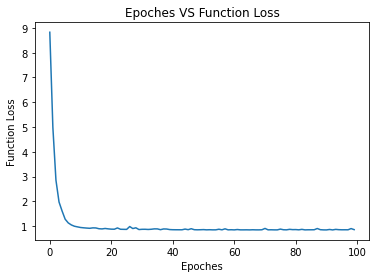

In [34]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差
rs = np.random.RandomState(seed = 42) # 固定随机数种子

# 1、创建数据集X，y
X = 2 * rs.rand(100, 7)
w = rs.randint(1,10,size = (7,1))
b = rs.randint(1,10,size = (1,1))
y = X.dot(w) + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X_ = np.c_[X, np.ones((100, 1))]

# 3、创建超参数轮次、样本数量
epoches = 100

# 4、定义一个函数来调整学习率
t0, t1 = 1, 100
def learning_rate_schedule(t):
    return t0/(t+t1)

# 5、初始化 W0...Wn，标准正太分布创建W
theta = rs.randn(8, 1) # 最后一个是偏置项，截距

# 6、梯度下降
loss = []
for i in range(epoches):
    indexes = np.arange(100)
    np.random.shuffle(indexes) # 打乱顺序
    X_ = X_[indexes] # 重排，洗牌
    y = y[indexes]
    
    for X_i,y_i in zip(X_,y): # 这里的依次遍历，相当于，随机抽取
        X_i = X_i.reshape(1,-1)
        y_i = y_i.reshape(1,-1)
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        learning_rate = learning_rate_schedule(i)
        theta -= learning_rate * g
    y_pred = X_.dot(theta) # 根据更新的系数，计算预测的目标值
    loss.append(mean_squared_error(y,y_pred))
print('正确的斜率和截距是：',w,b)
print('SGD计算的斜率截距是：',theta)

plt.plot(loss)
plt.xlabel('Epoches')
plt.ylabel('Function Loss')
plt.title('Epoches VS Function Loss')

#### scikit-learn中的SGD算法

In [37]:
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差
rs = np.random.RandomState(seed = 42) # 固定随机数种子

# 1、创建数据集X，y
X = 2 * rs.rand(100, 7)
w = rs.randint(1,10,size = (7,1))
b = rs.randint(1,10,size = (1,1))
y = X.dot(w) + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X_ = np.c_[X, np.ones((100, 1))]

model = SGDRegressor(fit_intercept = False,max_iter=2000,tol = 1e-5)
model.fit(X_,y.ravel())

model.score(X_,y)
print('scikit-learn模型，SGD返回的系数是：',model.coef_)
print('正确的斜率和截距是：',w.ravel(),b)

scikit-learn模型，SGD返回的系数是： [3.05212    0.63649154 5.82682083 1.97723042 7.81939367 4.80170547
 7.02612817 3.04736896]
正确的斜率和截距是： [3 1 6 2 8 5 7] [[2]]


In [29]:
np.power(4,0.25)

1.4142135623730951

### 小批量梯度下降MBGD

#### 一元一次线性回归

正确的斜率和截距是： 5 1
SGD计算的斜率截距是： [[4.9812206 ]
 [0.98877121]]


Text(0.5, 1.0, 'Epoches VS Function Loss')

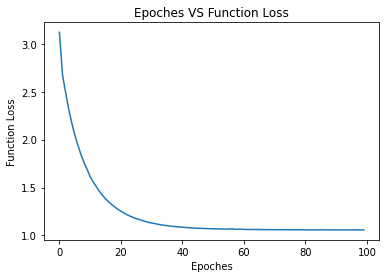

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差

# 1、创建数据集X，y
X = np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 1, 100
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 50
n = 100
batch_size = 16
num_batches = int(n / batch_size) # 6次

# 5、初始化 W0...Wn，标准正太分布创建W
theta = np.random.randn(2, 1)
loss = []

# 6、梯度下降
for epoch in range(epoches):
    indexes = np.arange(100)
    np.random.shuffle(indexes)
    X = X[indexes]
    y = y[indexes]
    learning_rate = learning_rate_schedule(epoch)
    for i in range(num_batches):
        X_batch = X[batch_size * i : batch_size * (1 + i)] # 16个样本
        y_batch = y[batch_size * i : batch_size * (1 + i)]
        g = X_batch.T.dot(X_batch.dot(theta) - y_batch)
        theta -= g * learning_rate
    y_pred = X.dot(theta)
    loss.append(mean_squared_error(y,y_pred))

print('正确的斜率和截距是：',w,b)
print('SGD计算的斜率截距是：',theta)

plt.plot(loss)
plt.xlabel('Epoches')
plt.ylabel('Function Loss')
plt.title('Epoches VS Function Loss')

#### 多元一次线性回归

------------ (100, 1)
正确的斜率和截距是： [3 2 5 4 3] [[7]]
SGD计算的斜率截距是： [3.0071 2.0071 5.0073 4.0057 3.0062 6.983 ]


Text(0.5, 1.0, 'Epoches VS Function Loss')

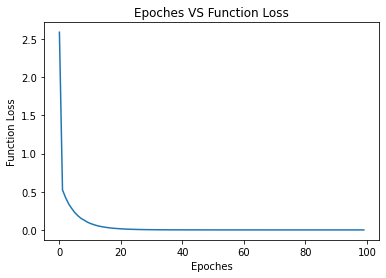

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # 均方误差

# 1、创建数据集X，y
X = np.random.rand(100, 5)
w = np.random.randint(1,10,size = (5,1))
b = np.random.randint(1,10,size = (1,1))
y = X.dot(w) + b + np.random.randn(100, 1)
print('------------',y.shape)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 1, 100
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 100
n = 100
batch_size = 16
num_batches = int(n / batch_size) # 12次

# 5、初始化 W0...Wn，标准正太分布创建W
theta = np.random.randn(6, 1)
loss = []

# 6、梯度下降
for epoch in range(epoches):
    indexes = np.arange(100)
    np.random.shuffle(indexes)
    X = X[indexes]
    y = y[indexes]
    learning_rate = learning_rate_schedule(epoch)
    for i in range(num_batches):
        X_batch = X[batch_size * i : batch_size * (1 + i)] # 16个样本
        y_batch = y[batch_size * i : batch_size * (1 + i)]
        g = X_batch.T.dot(X_batch.dot(theta) - y_batch)
        theta -= g * learning_rate
    y_pred = X.dot(theta)
    loss.append(mean_squared_error(y,y_pred))

print('正确的斜率和截距是：',w.ravel(),b)
print('SGD计算的斜率截距是：',theta.ravel().round(4))

plt.plot(loss)
plt.xlabel('Epoches')
plt.ylabel('Function Loss')
plt.title('Epoches VS Function Loss')